In [54]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.56 s (started: 2022-08-23 12:32:40 +00:00)


In [55]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 4.07 s (started: 2022-08-23 12:32:47 +00:00)


In [80]:
!mkdir test_data

mkdir: cannot create directory ‘test_data’: File exists
time: 142 ms (started: 2022-08-23 12:50:33 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("cat", limit = 10,output_dir='test_data',
                    adult_filter_off=True)

In [ ]:
downloader.download("soccer ball", limit = 10,output_dir='test_data',
                    adult_filter_off=True)

In [ ]:
downloader.download("dog", limit = 10,output_dir='test_data',
                    adult_filter_off=True)

In [63]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize




time: 998 µs (started: 2022-08-23 12:37:05 +00:00)


In [64]:
target = []
images = []
flat_data = []




time: 1 ms (started: 2022-08-23 12:37:08 +00:00)


In [81]:
DATADIR = '/content/images'
categories = ['cat','pretty sunflower','soccer ball']

for category in categories:
  class_num = categories.index(category)
  path = os.path.join(DATADIR,category)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data=np.append(flat_data,img_resized.flatten())
    images=np.append(images,img_resized)
    target=np.append(target,class_num)

  flat_data = np.array(flat_data)
  target = np.array(target)
  images = np.array(images)

time: 28.3 s (started: 2022-08-23 12:52:41 +00:00)


In [82]:
flat_data[0]

0.8258169934640534

time: 4.94 ms (started: 2022-08-23 12:53:15 +00:00)


In [83]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2.])

time: 6.23 ms (started: 2022-08-23 12:53:17 +00:00)


<BarContainer object of 3 artists>

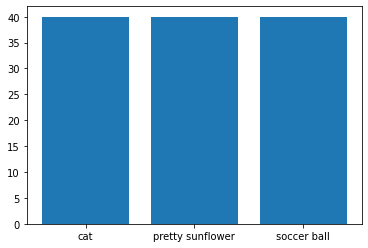

time: 161 ms (started: 2022-08-23 12:53:20 +00:00)


In [84]:
unique,count = np.unique(target,return_counts = True)
plt.bar(categories,count)

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target, test_size = 0.3, random_state =109)

ValueError: ignored

time: 30.5 ms (started: 2022-08-23 12:53:34 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':['1','10','100','1000'],'kernel':['linear']},
    {'C':['1','10','100','1000'],'gamma':['0.001','0.0001'] 'kernel':['rbf']},
]
svc = svm.SVC(probability= True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

In [ ]:
flat_data = []
url = input('Enter your url : ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories(y_out[0])
print(f"PREDICTED OUTPUT: {y_out}")

In [ ]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok


In [ ]:
%%writefile app.py

import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import images
st.title('Image Classifier using Machine Learning')
st.text('Upload the image (only jpg file)')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type = "jpg")

if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption = 'Upload Image')

  if st.button('PREDICT')
    categories = ['cat','soccer ball', 'dog']
    st.write('RESULT...')
    flat_data = []
    img = np.array[img]
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    print(img.shape)
    plt.imshow(img_resized)
    y_out = model.predict(flat_data)
    y_out = categories(y_out[0])
    print(f"PREDICTED OUTPUT: {y_out}")


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port = '8501')
url